In [56]:
from __future__ import division, print_function
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

from matplotlib import mlab
from kid_readout.measurement.io import npy
from kid_readout.measurement import basic, plot_basic
from kid_readout.analysis.timeseries import binning, filters
from kid_readout.analysis.resonator import lmfit_resonator

In [81]:
save_directory = '/home/flanigan/temp/'
save_Sxx_Syy_vs_frequency_all_attenuations_3347_MHz = True
save_Sxx_Syy_vs_frequency_20_dB_poly1_subtracted_3347_MHz = True

In [2]:
npd = npy.NumpyDirectory('/data/readout/2017-12-15_095400_mmw.npd/')

In [3]:
npd.node_names()

['SingleSweep0',
 'SingleSweepStreamList1',
 'ADCSnap2',
 'SingleSweepStreamList3',
 'ADCSnap4',
 'SingleSweepStreamList5',
 'ADCSnap6']

In [4]:
initial = npd.SingleSweep0
all_sssl = [npd.read(name) for name in npd.node_names() if name.startswith('SingleSweepStreamList')]
all_snap = [npd.read(name) for name in npd.node_names() if name.startswith('ADCSnap')]

In [5]:
for sssl in all_sssl:
    sssl.single_sweep.fit_resonator(model=lmfit_resonator.LinearLossResonatorWithCable)

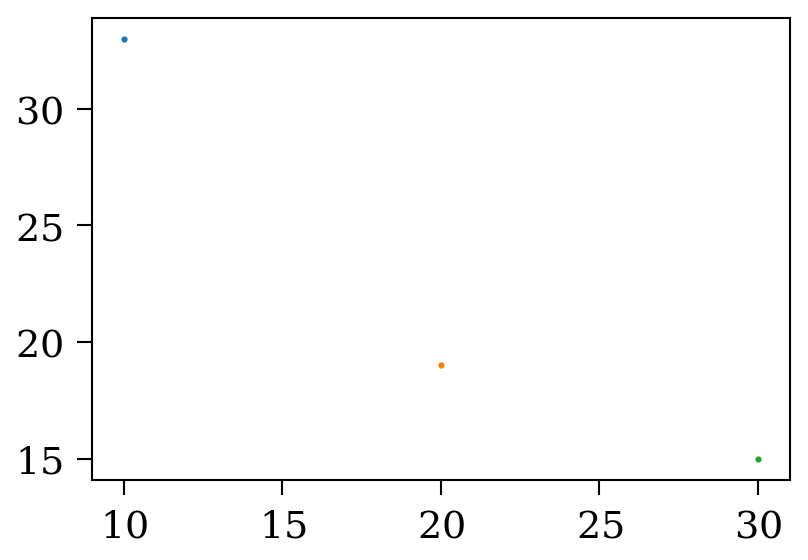

In [6]:
fig, ax = plt.subplots()
for sssl, snap in zip(all_sssl, all_snap):
    ax.plot(sssl.stream_list[2].roach_state.dac_attenuation, snap.x.ptp(), '.')

In [7]:
def sss_from_sssl(sssl):
    stream_off, stream_mod, stream_on = sssl.stream_list
    sss_off = basic.SingleSweepStream(sweep=sssl.single_sweep, stream=stream_off)
    sss_mod = basic.SingleSweepStream(sweep=sssl.single_sweep, stream=stream_mod)
    sss_on = basic.SingleSweepStream(sweep=sssl.single_sweep, stream=stream_on)
    return sss_off, sss_mod, sss_on

In [8]:
all_sss = [sss_from_sssl(sssl) for sssl in all_sssl]

In [73]:
def plot_sssl(sss_off, sss_mod, sss_on):
    fig, (ax_off, ax_mod, ax_on) = plt.subplots(1, 3, figsize=(6, 2),
                                                gridspec_kw={'hspace': 0.4, 'wspace': 0.5})
    plot_basic.sss_complex_plane(axis=ax_off, sss=sss_off)
    ax_off.set_title("off, {:.1f} dB".format(sss_off.stream.roach_state.dac_attenuation), fontsize='xx-small')
    plot_basic.sss_complex_plane(axis=ax_mod, sss=sss_mod)
    ax_mod.set_title("mod, {:.1f} dB".format(sss_mod.stream.roach_state.dac_attenuation), fontsize='xx-small') 
    plot_basic.sss_complex_plane(axis=ax_on, sss=sss_on)
    ax_on.set_title("on, {:.1f} dB".format(sss_off.stream.roach_state.dac_attenuation), fontsize='xx-small')
    for ax in (ax_off, ax_mod, ax_on):
            ax.tick_params(labelsize='xx-small')
    return fig, (ax_off, ax_mod, ax_on)


def plot_Sxx(ax, sss_off, sss_mod, sss_on):
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('frequency / Hz')
    ax.set_ylabel('spectral density / Hz$^{-1}$')
    ax.plot(sss_off.S_frequency, sss_off.S_xx, label='off: $S_{xx}$')
    ax.plot(sss_mod.S_frequency, sss_mod.S_xx, label='mod: $S_{xx}$')
    ax.plot(sss_on.S_frequency, sss_on.S_xx, label='on: $S_{xx}$')
    ax.legend(fontsize='xx-small', loc='center left', bbox_to_anchor=(1, 0.5))

    
def plot_Sxy(ax, sss_off, sss_mod, sss_on):
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('frequency / Hz')
    ax.set_ylabel('spectral density / Hz$^{-1}$')
    ax.plot(sss_off.S_frequency, np.real(sss_off.S_xy), label='off: Re $S_{xy}$')
    ax.plot(sss_off.S_frequency, np.imag(sss_off.S_xy), label='off: Im $S_{xy}$')
    ax.plot(sss_mod.S_frequency, np.real(sss_mod.S_xy), label='mod: Re $S_{xy}$')
    ax.plot(sss_mod.S_frequency, np.imag(sss_mod.S_xy), label='mod: Im $S_{xy}$')
    ax.plot(sss_on.S_frequency, np.real(sss_on.S_xy), label='on: Re $S_{xy}$')
    ax.plot(sss_on.S_frequency, np.imag(sss_on.S_xy), label='on: Im $S_{xy}$')
    ax.legend(fontsize='xx-small', loc='center left', bbox_to_anchor=(1, 0.5))
    
    
def plot_Sxx_attenuation(ax, *some_sss):
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('frequency / Hz')
    ax.set_ylabel('spectral density / Hz$^{-1}$')    
    for sss in some_sss:
        ax.plot(sss.S_frequency, sss.S_xx, label='{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
    ax.legend(fontsize='xx-small', loc='center left', bbox_to_anchor=(1, 0.5))

    
def plot_Sxy_attenuation(ax, *some_sss):
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('frequency / Hz')
    ax.set_ylabel('spectral density / Hz$^{-1}$')    
    for sss in some_sss:
        ax.plot(sss.S_frequency, np.abs(sss.S_xy), label='{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
    ax.legend(fontsize='xx-small', loc='center left', bbox_to_anchor=(1, 0.5))

    
def plot_Sxx_Syy_attenuation(ax, *some_sss):
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('frequency / Hz')
    ax.set_ylabel('spectral density / Hz$^{-1}$')    
    for sss in some_sss:
        ax.plot(sss.S_frequency, sss.S_xx,
                linestyle='-', label='$S_{xx}$: ' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
        ax.plot(sss.S_frequency, sss.S_yy,
                linestyle='--', label='$S_{yy}$: ' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
    ax.legend(fontsize='xx-small', loc='center left', bbox_to_anchor=(1, 0.5))
    

def calculate_Sqq_Sxx_raw_poly_subtracted(sss, NFFT=None,
                                          window=mlab.window_hanning, detrend=mlab.detrend_none, noverlap=None,
                                          binned=True, bins_per_decade=30, **psd_kwds):
    if NFFT is None:
        NFFT = int(2**(np.floor(np.log2(sss.stream.s21_raw.size)) - 3))
    if noverlap is None:
        noverlap = NFFT // 2
    S_qq, _ = mlab.psd(sss.q_raw, Fs=sss.stream.stream_sample_rate, NFFT=NFFT, window=window, detrend=detrend,
                       noverlap=noverlap, **psd_kwds)
    S_xx, _ = mlab.psd(sss.x_raw, Fs=sss.stream.stream_sample_rate, NFFT=NFFT, window=window, detrend=detrend,
                       noverlap=noverlap, **psd_kwds)
    S_xq, f = mlab.csd(x, q, Fs=sss.stream.stream_sample_rate, NFFT=NFFT, window=window, detrend=detrend,
                       noverlap=noverlap, **psd_kwds)
    f = f[1:-1]
    S_xx = S_xx[1:-1]
    S_qq = S_qq[1:-1]
    S_xq = S_xq[1:-1]
    ndof = 2 * x.size // NFFT
    if binned:
        edges, counts, f_mean, d_and_v = binning.log_bin_with_variance(f, bins_per_decade,
                                                                       (S_xx, S_xx**2 / ndof),
                                                                       (S_qq, S_qq**2 / ndof),
                                                                       (S_xq, S_xq**2 / ndof))
        (S_xx, V_xx), (S_qq, V_qq), (S_xq, V_xq) = d_and_v
    else:
        edges = None
        counts = np.ones(f.size, dtype=int)
        f_mean = f
        V_xx = S_xx**2 / ndof
        V_qq = S_qq**2 / ndof
        V_xq = S_xq**2 / ndof
    return f_mean, S_xx, S_qq, S_xq


def decimate(sss, downsample, num_taps=256):
    f_nyquist = sss.stream.stream_sample_rate / 2
    x_lpf = filters.low_pass_fir(sss.x, num_taps=num_taps, cutoff=f_nyquist / downsample,
                                 nyquist_freq=f_nyquist, decimate_by=downsample)
    q_lpf = filters.low_pass_fir(sss.q, num_taps=num_taps, cutoff=f_nyquist / downsample,
                                 nyquist_freq=f_nyquist, decimate_by=downsample)
    t = sss.stream.sample_time[::downsample]
    size = min(t.size, x_lpf.size)
    return t[:size], x_lpf[:size], q_lpf[:size]


def plot_decimated(ax, sss_off, sss_mod, sss_on, downsample=64):
    ax.set_xlabel('time / s')
    ax.set_ylabel('$10^6 \; x$')
    t_mod, x_mod, q_mod = decimate(sss_mod, downsample=downsample)
    t_off, x_off, q_off = decimate(sss_off, downsample=downsample)
    t_on, x_on, q_on = decimate(sss_on, downsample=downsample)
    ax.plot(t_mod, 1e6 * x_mod, label='mod')
    ax.plot(t_off, 1e6 * x_off, label='off')
    ax.plot(t_on, 1e6 * x_on, label='on')
    ax.legend(fontsize='xx-small', ncol=3)    

# Initial sweep

In [49]:
print("Initial resonance is {:.1f} MHz".format(1e-6 * initial.resonator.f_0))

Initial resonance is 3347.3 MHz


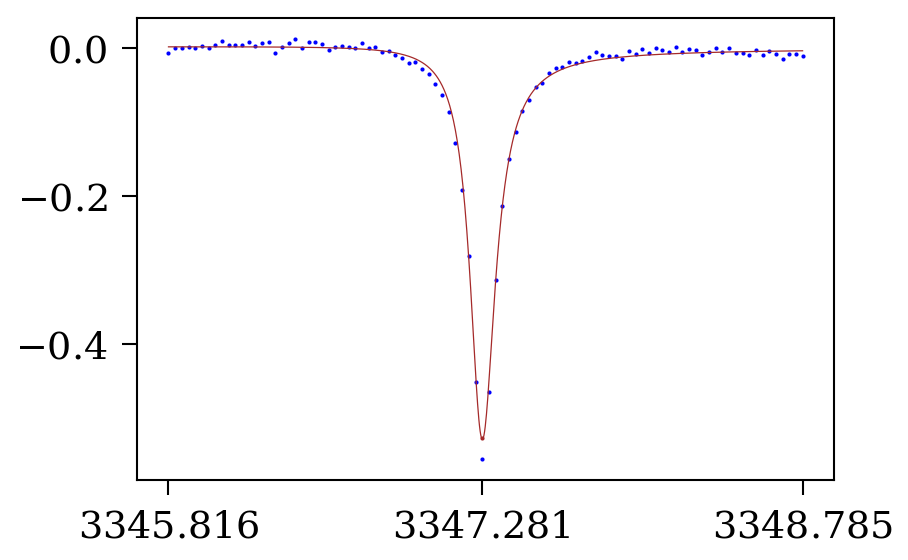

In [50]:
fig, ax = plt.subplots()
plot_basic.resonator_amplitude(axis=ax, resonator=initial.resonator);

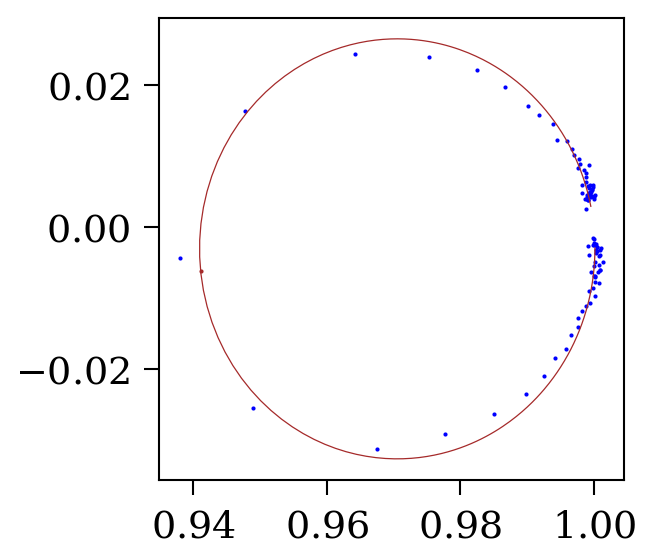

In [11]:
fig, ax = plt.subplots(figsize=(2, 2))
plot_basic.resonator_complex_plane(axis=ax, resonator=initial.resonator);

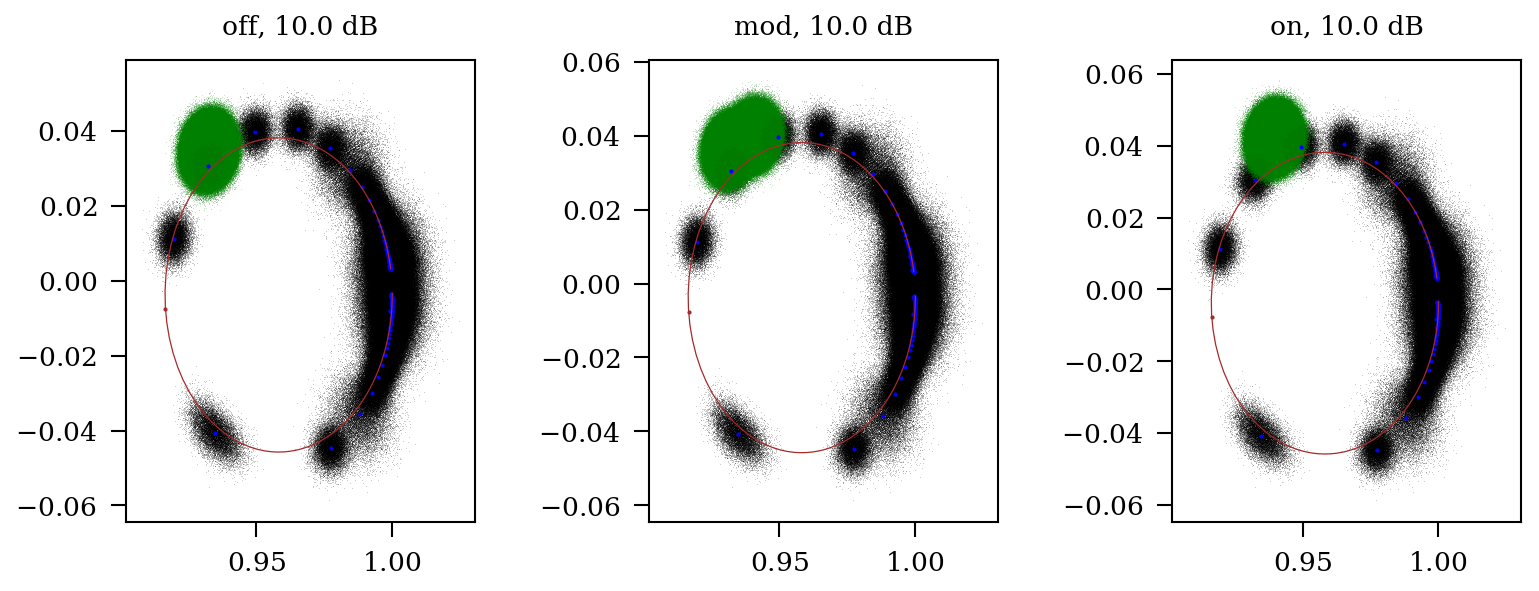

In [12]:
fig, axes = plot_sssl(*all_sss[0])

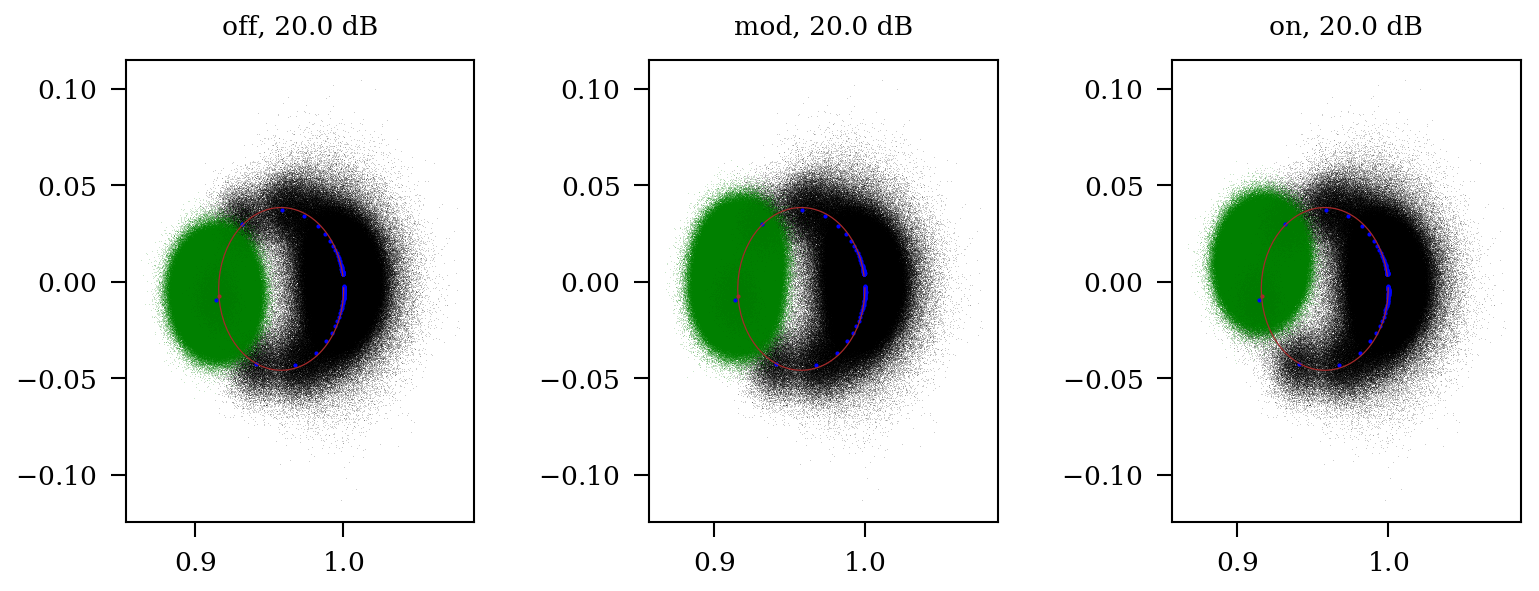

In [13]:
fig, axes = plot_sssl(*all_sss[1])

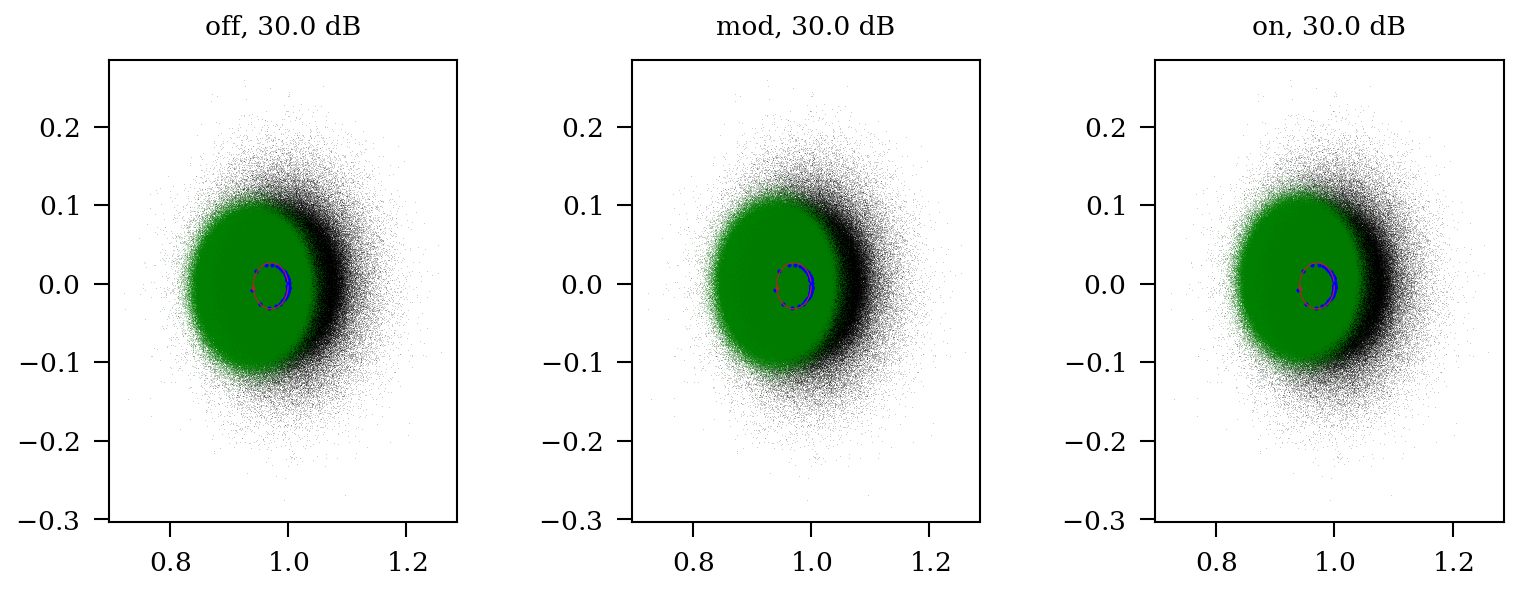

In [14]:
fig, axes = plot_sssl(*all_sss[2])

# Time -ordered data

In [98]:
# Save TOD for Brad
#data = np.vstack((all_sss[1][0].x_raw, all_sss[1][0].q_raw)).T
#data.shape

#np.savetxt('/home/flanigan/share/x_and_q_raw_3347_MHz.txt', data, delimiter=', ', header='x, q')

(8388608, 2)

/home/flanigan/readout/kid_readout/kid_readout/analysis/timeseries/fftfilt.py:78: ComplexWarning: Casting complex values to real discards the imaginary part
  y[i:k] = y[i:k] + yt[:k-i]            # and add


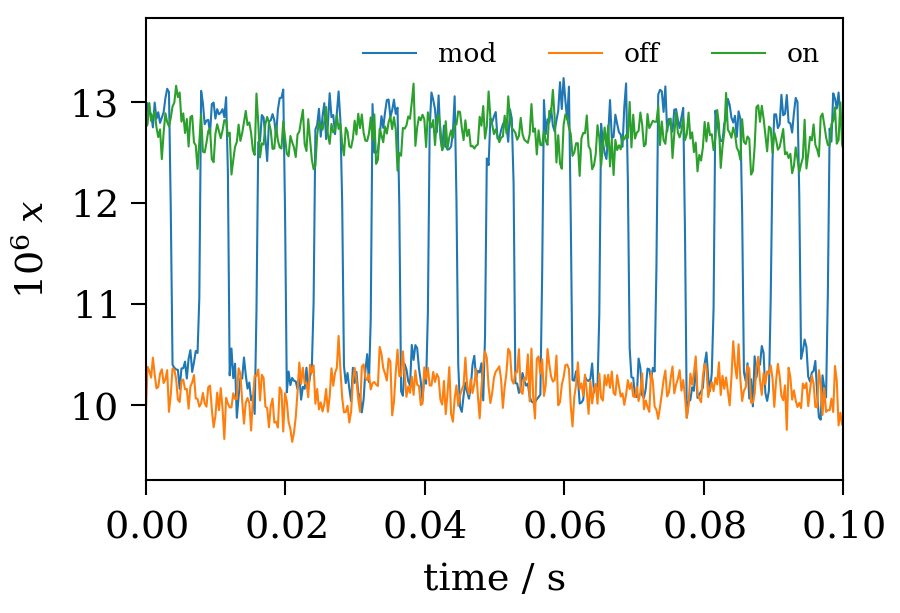

In [15]:
fig, ax = plt.subplots()
plot_decimated(ax, *all_sss[0], downsample=64)
ax.set_xlim(0, 0.1);

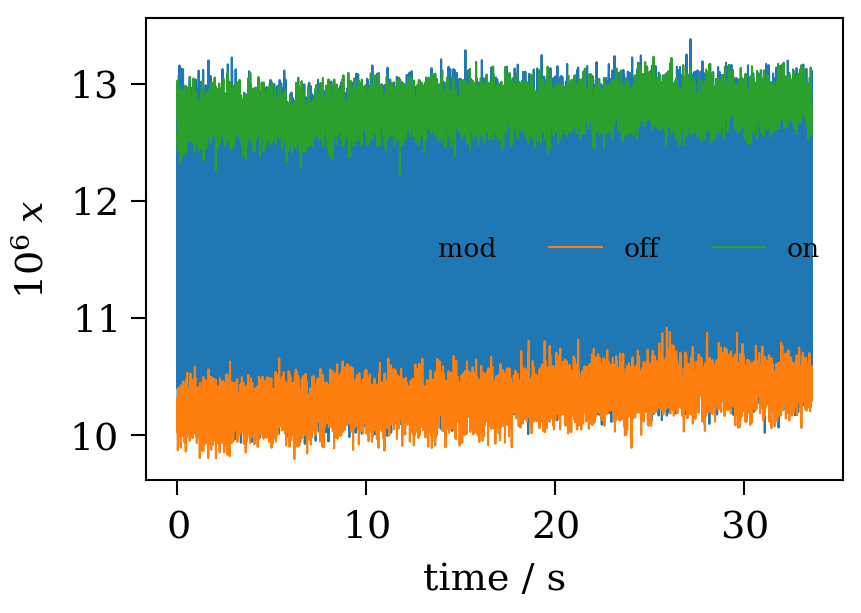

In [16]:
fig, ax = plt.subplots()
plot_decimated(ax, *all_sss[0], downsample=2**10)

# Unbinned spectra

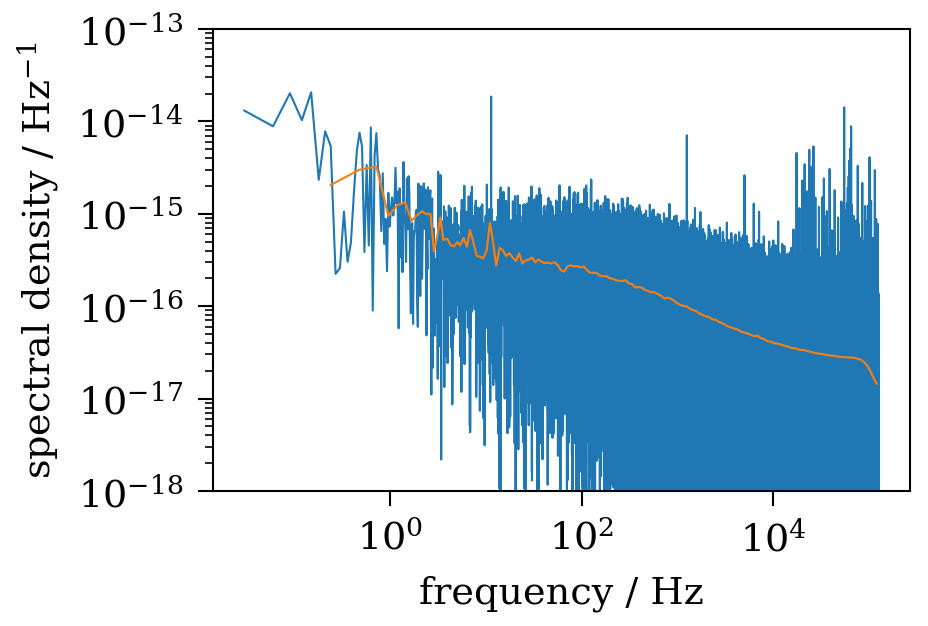

In [107]:
sss = all_sss[1][0]
sss.set_S(binned=False, NFFT=sss.stream.sample_time.size, window=mlab.window_none, detrend=mlab.detrend_linear)
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('frequency / Hz')
ax.set_ylabel('spectral density / Hz$^{-1}$')
ax.plot(sss.S_frequency, sss.S_xx,
        linestyle='-', label='$S_{xx}$: ' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
sss.set_S(binned=True, window=mlab.window_none, detrend=mlab.detrend_linear)
ax.plot(sss.S_frequency, sss.S_xx,
        linestyle='-', label='$S_{xx}$: ' + '{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
ax.set_ylim(1e-18, 1e-13)
fig.savefig(save_directory + 'Sxx_binned_and_unbinned.png')

# Subtract signal from TOD

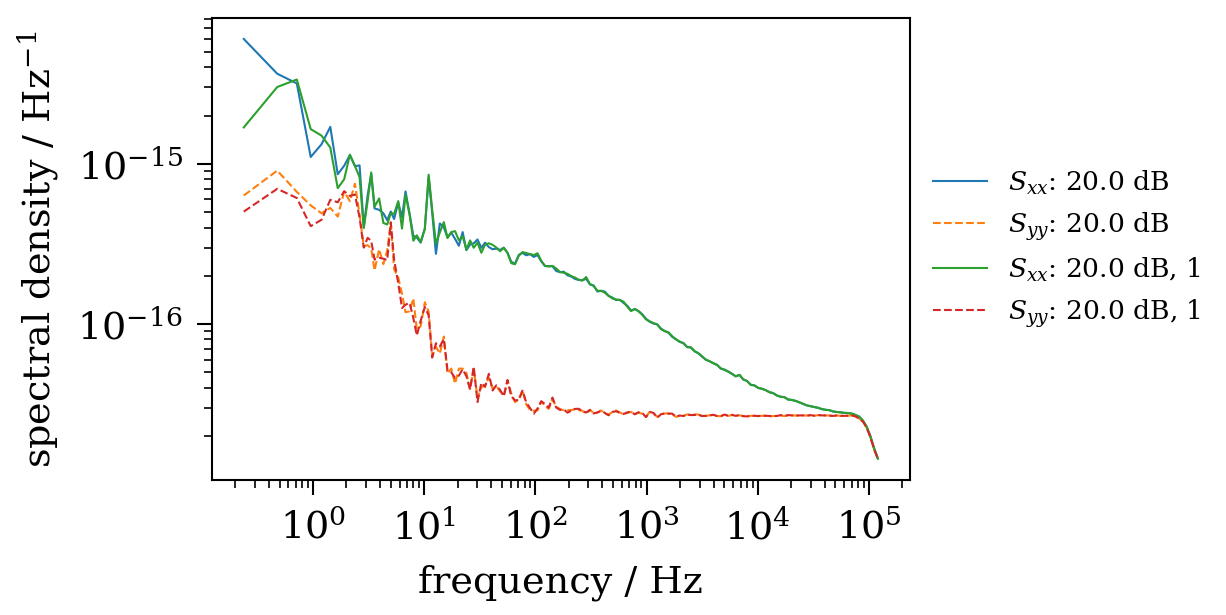

In [84]:
sss = all_sss[1][0]
fig, ax = plt.subplots()
plot_Sxx_Syy_attenuation(ax, sss)

poly_degree=1
Sf, Sxx, Sqq, Sxq = calculate_Sqq_Sxx_raw_poly_subtracted(sss, window=mlab.window_hanning, detrend=mlab.detrend_linear)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('frequency / Hz')
ax.set_ylabel('spectral density / Hz$^{-1}$')
ax.plot(Sf, Sxx,
        linestyle='-', label='$S_{xx}$: ' + '{:.1f} dB, {:d}'.format(sss.stream.roach_state.dac_attenuation, poly_degree))
ax.plot(Sf, Sqq / 4,
        linestyle='--', label='$S_{yy}$: ' + '{:.1f} dB, {:d}'.format(sss.stream.roach_state.dac_attenuation, poly_degree))
ax.legend(fontsize='xx-small', loc='center left', bbox_to_anchor=(1, 0.5))

#if save_Sxx_Syy_vs_frequency_20_dB_poly1_subtracted_3347_MHz:
#    fig.savefig(save_directory + 'Sxx_Syy_vs_frequency_20_dB_poly1_subtracted_3347_MHz.pdf')

# Noise spectra

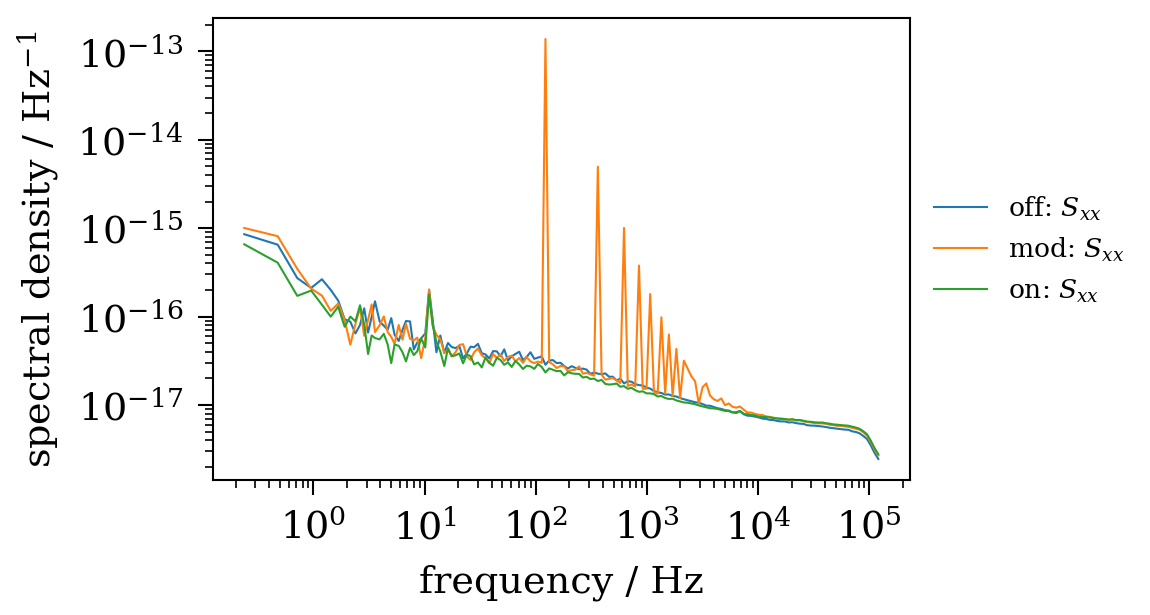

In [35]:
fig, ax = plt.subplots()
plot_Sxx(ax, *all_sss[0])

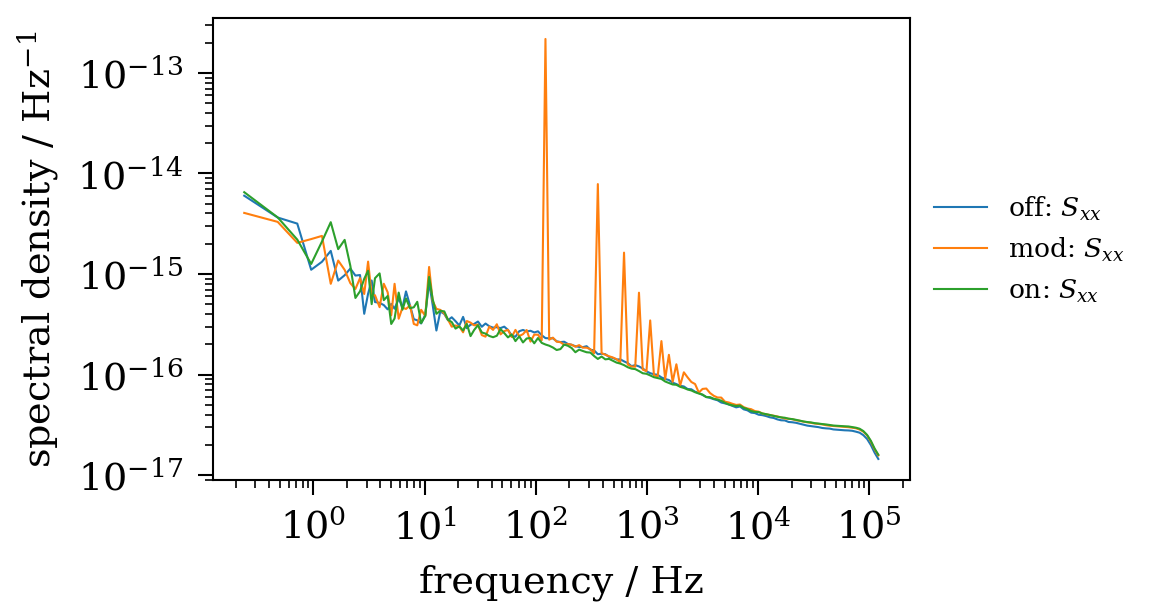

In [36]:
fig, ax = plt.subplots()
plot_Sxx(ax, *all_sss[1])

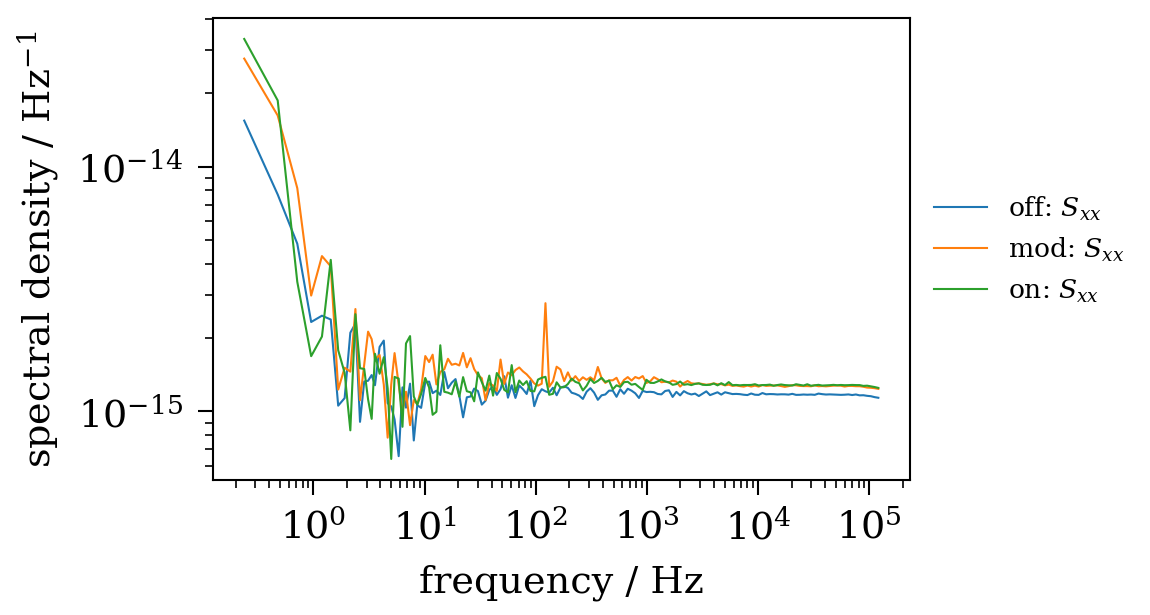

In [37]:
fig, ax = plt.subplots()
plot_Sxx(ax, *all_sss[2])

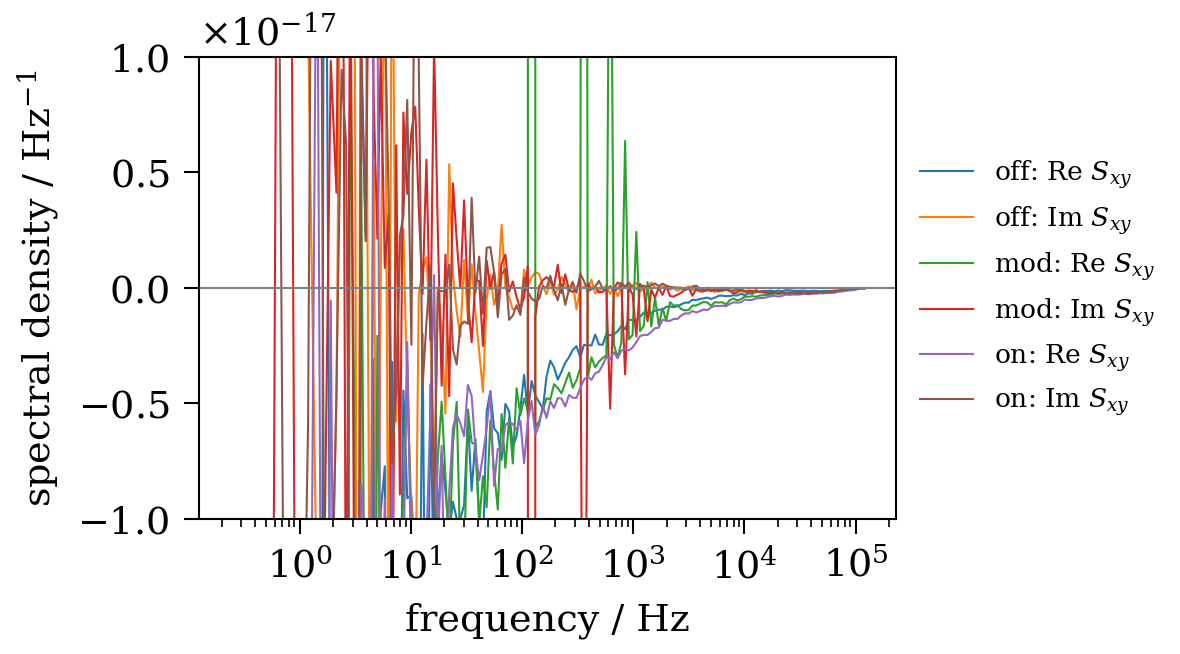

In [38]:
fig, ax = plt.subplots()
plot_Sxy(ax, *all_sss[0])
ax.set_yscale('linear')
ax.axhline(0, color='gray')
ax.set_ylim(-1e-17, 1e-17);

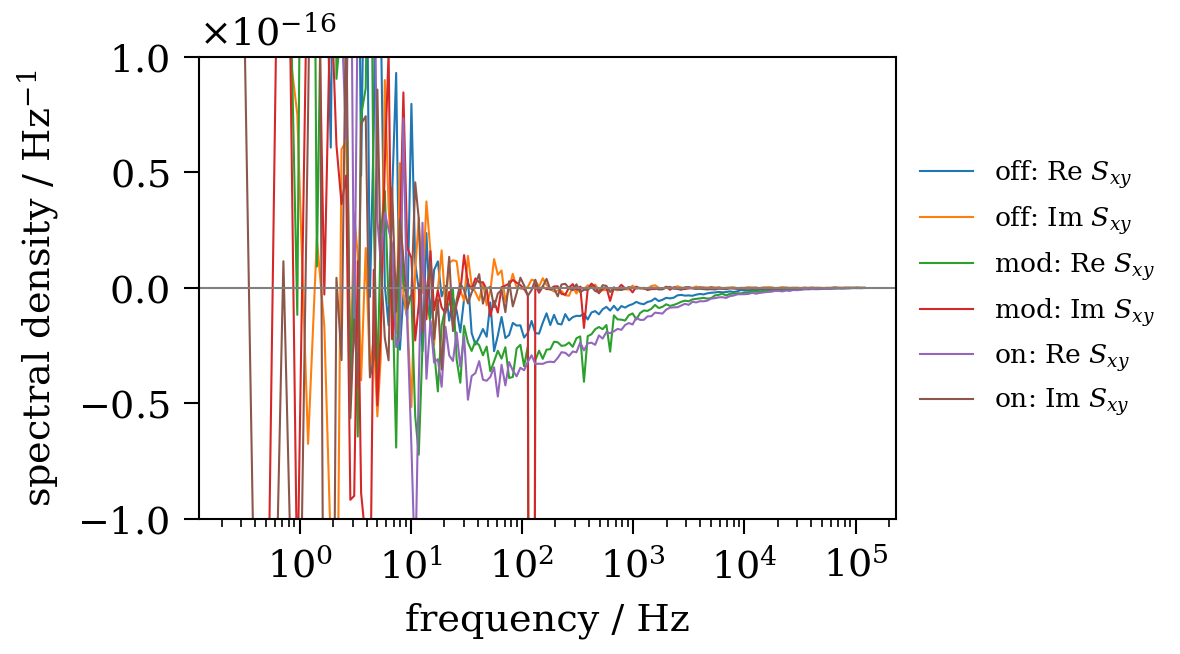

In [39]:
fig, ax = plt.subplots()
plot_Sxy(ax, *all_sss[1])
ax.set_yscale('linear')
ax.axhline(0, color='gray')
ax.set_ylim(-1e-16, 1e-16);

In [40]:
sss_off = [sss_tuple[0] for sss_tuple in all_sss]
sss_mod = [sss_tuple[1] for sss_tuple in all_sss]
sss_on = [sss_tuple[2] for sss_tuple in all_sss]

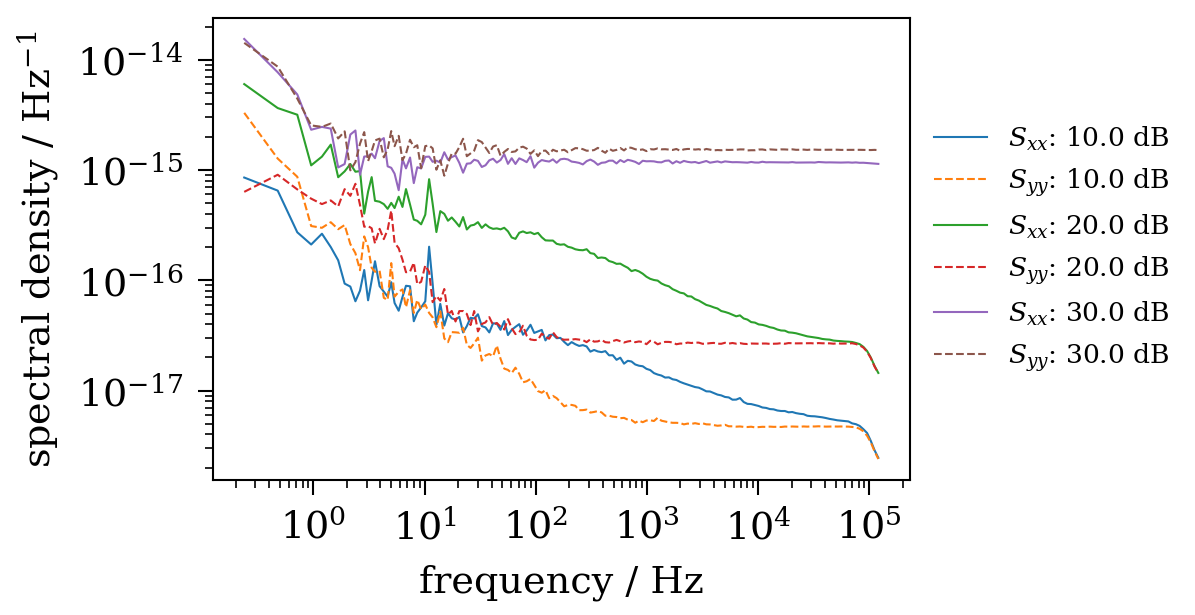

In [41]:
fig, ax = plt.subplots()
plot_Sxx_Syy_attenuation(ax, *sss_off)

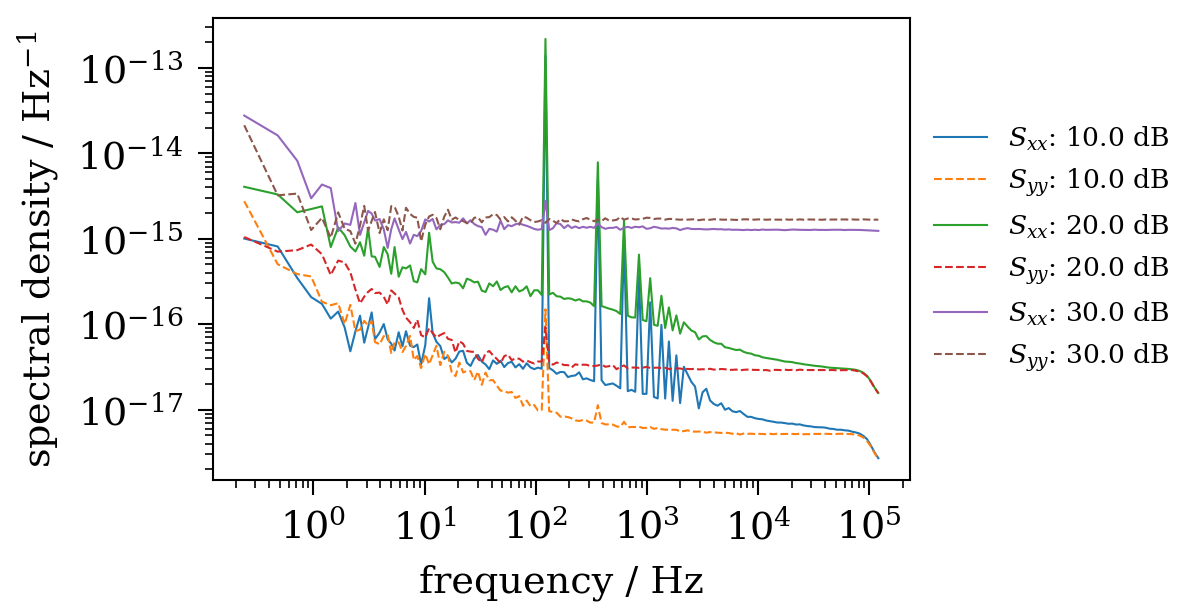

In [42]:
fig, ax = plt.subplots()
plot_Sxx_Syy_attenuation(ax, *sss_mod)

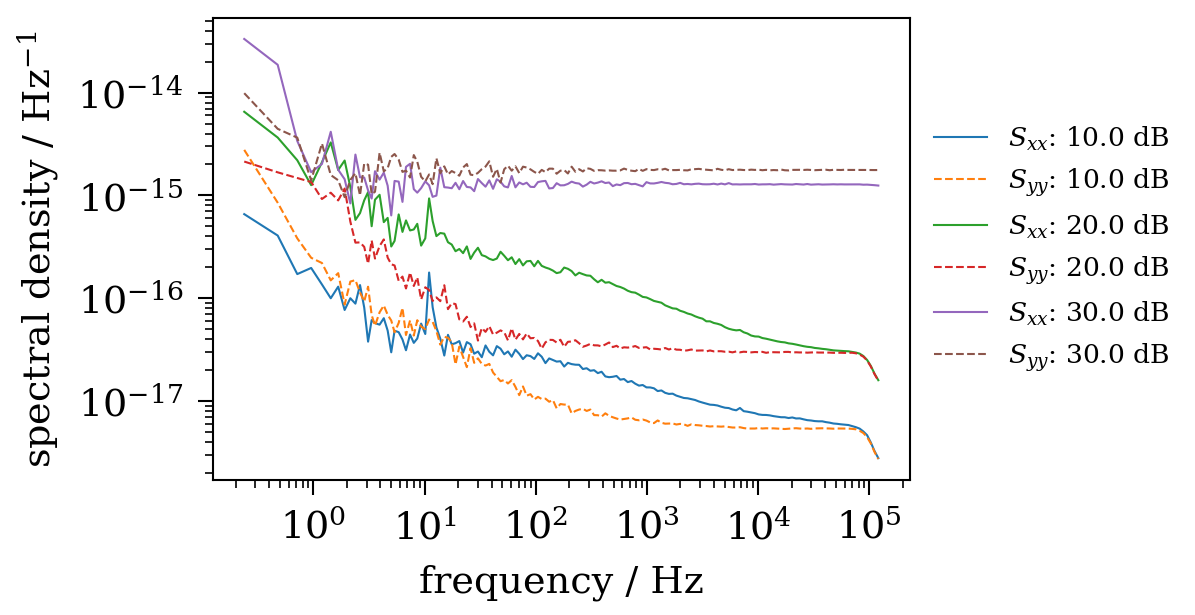

In [54]:
fig, ax = plt.subplots()
plot_Sxx_Syy_attenuation(ax, *sss_on)

if save_Sxx_Syy_vs_frequency_all_attenuations_3347_MHz:
    fig.savefig(save_directory + 'Sxx_Syy_vs_frequency_all_attenuations_3347_MHz.pdf')

# Cross-spectrum

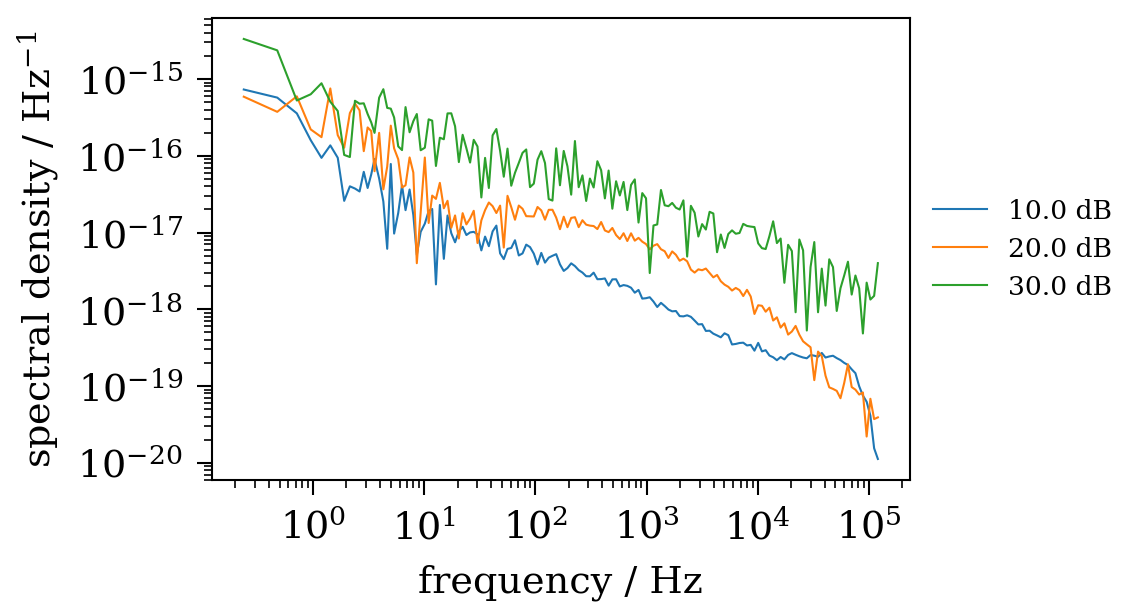

In [44]:
fig, ax = plt.subplots()
plot_Sxy_attenuation(ax, *sss_off)

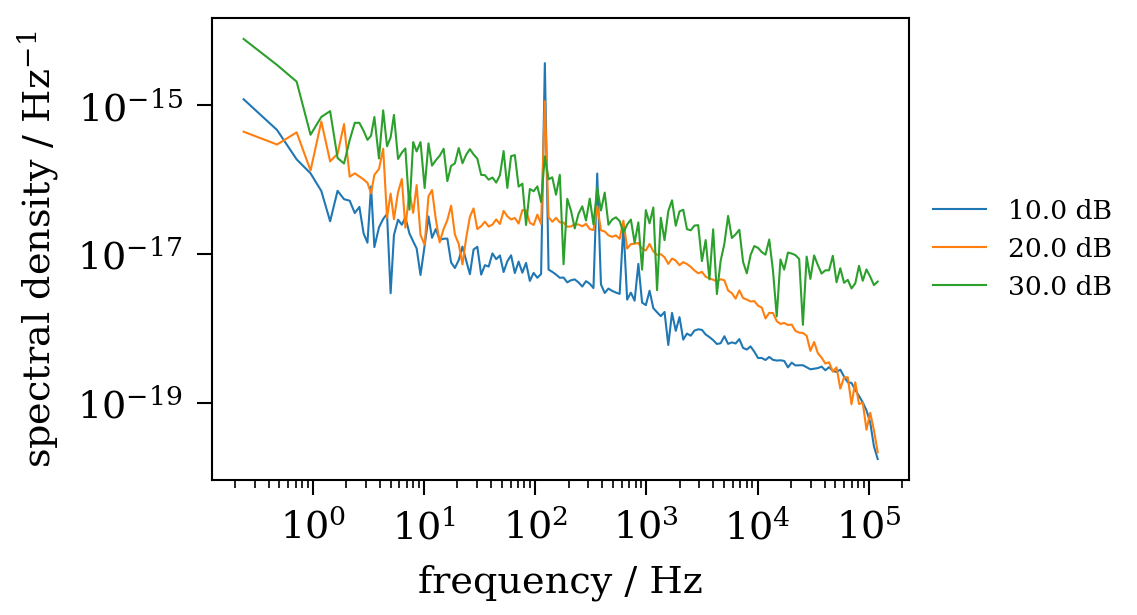

In [45]:
fig, ax = plt.subplots()
plot_Sxy_attenuation(ax, *sss_mod)

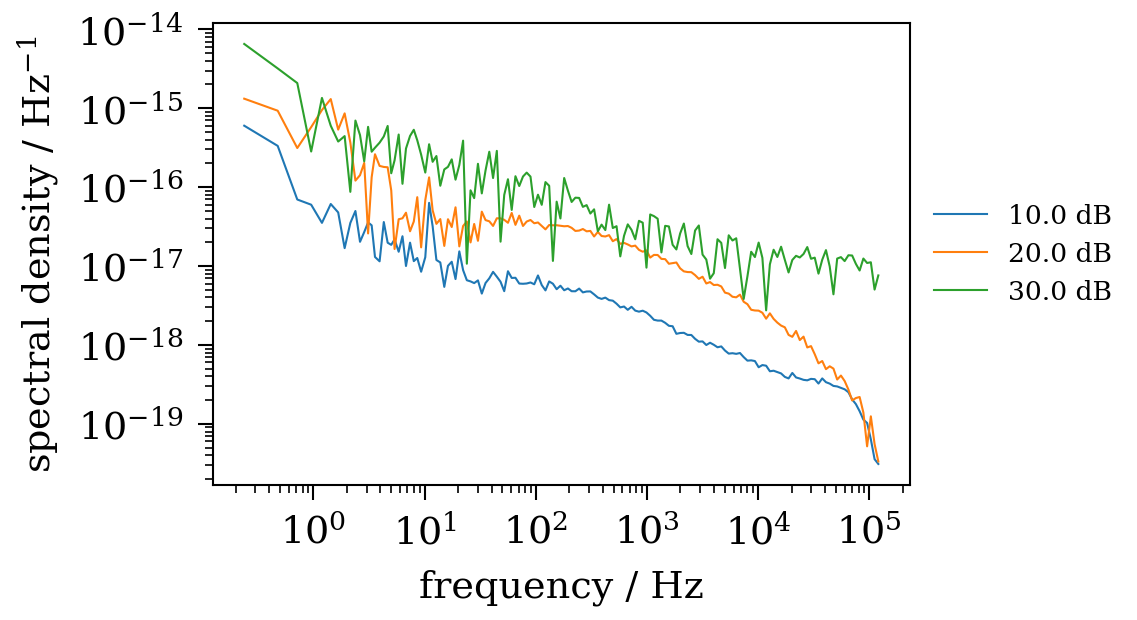

In [46]:
fig, ax = plt.subplots()
plot_Sxy_attenuation(ax, *sss_on)